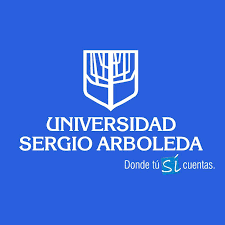

###***Integrantes:***

* Santiago Niño
* Esteban Rodriguez
* Daniel Velasquez
* Laura Ojeda

Simular 4 nodos en Python.
Sobre los nodos simular 4 osciladores (Diferentes frecuencias)

Resolver los siguientes puntos:

Diseñar el acople de los simuladores
Implementar el modelo de Kuramoto.
Comparar los dos tipo de acoples.

###***Taller Sincronización***
* Simular 4 nodos aleatorios (Python).
* Simular 4 oscialdores.
* Diseñar el acople de los simuladores.
* Implementar el modelo de kuramoto


###***Simulación de nodos aleatorios:***

Esto implica crear cuatro nodos con características aleatorias que representen los osciladores en tu sistema.

Puedes considerar atributos como fase inicial, frecuencia natural, amplitud, etc.

###***Desarrollo:***

###***Simulación de osciladores con diferentes frecuencias:***

Cada nodo tendrá una frecuencia natural aleatoria.
Puedes generar estas frecuencias de manera aleatoria dentro de un rango determinado para cada nodo.

In [ ]:
import numpy as np

class Nodo:
    def __init__(self):
        self.fase_inicial = np.random.uniform(0, 2*np.pi)  # Fase inicial aleatoria entre 0 y 2*pi
        self.frecuencia_natural = np.random.uniform(0.5, 2.0)  # Frecuencia natural aleatoria entre 0.5 y 2.0
        self.amplitud = np.random.uniform(0.1, 1.0)  # Amplitud aleatoria entre 0.1 y 1.0

# Crear cuatro nodos aleatorios
nodos = [Nodo() for _ in range(4)]

# Imprimir las características de cada nodo
for i, nodo in enumerate(nodos):
    print(f"Nodo {i+1}:")
    print(f"Fase inicial: {nodo.fase_inicial}")
    print(f"Frecuencia natural: {nodo.frecuencia_natural}")
    print(f"Amplitud: {nodo.amplitud}")
    print()


Nodo 1:
Fase inicial: 2.374334678067745
Frecuencia natural: 0.6854572334122588
Amplitud: 0.31480579686037746

Nodo 2:
Fase inicial: 3.2399979998546535
Frecuencia natural: 0.9862794405878573
Amplitud: 0.795582284996178

Nodo 3:
Fase inicial: 4.1840474618458146
Frecuencia natural: 0.5562529952004491
Amplitud: 0.7198413029023191

Nodo 4:
Fase inicial: 5.8875526480848706
Frecuencia natural: 1.0804464726106295
Amplitud: 0.9561576029167423



###***Diseño del acople de los simuladores:***

* El acople determina cómo interactúan los nodos entre sí. Puede ser un acoplamiento global o local, dependiendo de cómo deseas modelar la interacción entre los osciladores.
* Por ejemplo, podrías implementar un acoplamiento simple donde cada nodo se conecta con todos los demás.

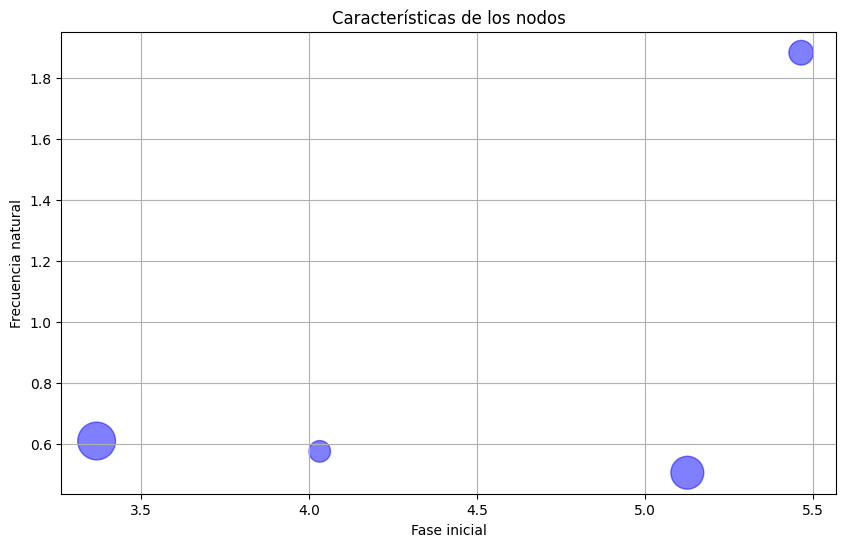

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Nodo:
    def __init__(self):
        self.fase_inicial = np.random.uniform(0, 2*np.pi)  # Fase inicial aleatoria entre 0 y 2*pi
        self.frecuencia_natural = np.random.uniform(0.5, 2.0)  # Frecuencia natural aleatoria entre 0.5 y 2.0
        self.amplitud = np.random.uniform(0.1, 1.0)  # Amplitud aleatoria entre 0.1 y 1.0

# Crear cuatro nodos aleatorios
nodos = [Nodo() for _ in range(4)]

# Extraer características de cada nodo
fases_iniciales = [nodo.fase_inicial for nodo in nodos]
frecuencias_naturales = [nodo.frecuencia_natural for nodo in nodos]
amplitudes = [nodo.amplitud for nodo in nodos]

# Multiplicar las amplitudes por un factor de escala
escala = 1000  # Ajusta este valor según lo grande que desees que sean los puntos
tamanio_puntos = [amplitud * escala for amplitud in amplitudes]

# Graficar las características de los nodos
plt.figure(figsize=(10, 6))
plt.scatter(fases_iniciales, frecuencias_naturales, s=tamanio_puntos, c='blue', alpha=0.5)  # Tamaño de los puntos proporcional a la amplitud
plt.xlabel('Fase inicial')
plt.ylabel('Frecuencia natural')
plt.title('Características de los nodos')
plt.grid(True)
plt.show()



* **Eje X** **(Fase inicial):** La posición horizontal del punto en el eje x representa la fase inicial del nodo. En tu caso, cada nodo tiene una fase inicial única entre
0
0 y
2
π
2π radianes. Por lo tanto, la posición horizontal de cada punto en la gráfica indica la fase inicial correspondiente de ese nodo.

* **Eje Y (Frecuencia natural):** La posición vertical del punto en el eje y representa la frecuencia natural del nodo. Cada nodo tiene una frecuencia natural única, que determina su velocidad intrínseca de oscilación. La posición vertical de cada punto en la gráfica indica la frecuencia natural correspondiente de ese nodo.

* **Tamaño del Punto (Amplitud):** El tamaño de cada punto en la gráfica está determinado por la amplitud del nodo. La amplitud indica la "intensidad" o "amplitud máxima" de la oscilación del nodo. Cuanto mayor sea la amplitud, más grande será el punto en la gráfica.

* Por lo tanto, al observar la gráfica, puedes ver cómo se distribuyen los nodos en función de su fase inicial, frecuencia natural y amplitud. Esta visualización te permite comprender mejor las características individuales de cada nodo y cómo están distribuidos en el espacio de características del sistema de osciladores.*

In [ ]:
import numpy as np

class AcoplamientoGlobal:
    def __init__(self, nodos):
        self.nodos = nodos
        self.num_nodos = len(nodos)
        # Inicializar matriz de acoplamiento con fuerzas aleatorias
        self.acoplamiento = np.random.uniform(0, 0.1, size=(self.num_nodos, self.num_nodos))
        np.fill_diagonal(self.acoplamiento, 0)  # Los nodos no se acoplan a sí mismos

    def actualizar(self):
        for i, nodo_i in enumerate(self.nodos):
            sumatoria = np.zeros_like(nodo_i.fase)  # Inicializar sumatoria como un vector de ceros
            for j, nodo_j in enumerate(self.nodos):
                if i != j:  # Evitar acoplamiento consigo mismo
                    sumatoria += np.sin(nodo_j.fase - nodo_i.fase)
            nodo_i.fase_pendiente = nodo_i.frecuencia_natural + np.dot(sumatoria, self.acoplamiento[i])


    def avanzar_paso_temporal(self, dt):
        for nodo in self.nodos:
            nodo.fase += nodo.fase_pendiente * dt

class Nodo:
    def __init__(self):
        self.fase = np.random.uniform(0, 2*np.pi)  # Fase inicial aleatoria
        self.fase_pendiente = 0
        self.frecuencia_natural = np.random.uniform(0.5, 2.0)  # Frecuencia natural aleatoria

# Crear cuatro nodos aleatorios
nodos = [Nodo() for _ in range(4)]

# Crear acoplamiento global
acoplamiento = AcoplamientoGlobal(nodos)

# Simular la sincronización durante cierto número de pasos de tiempo
num_pasos_temporales = 100
dt = 0.1  # Tamaño del paso temporal
for _ in range(num_pasos_temporales):
    acoplamiento.actualizar()
    acoplamiento.avanzar_paso_temporal(dt)

# Imprimir las fases finales de los nodos
for i, nodo in enumerate(nodos):
    print(f"Nodo {i+1}: Fase final = {nodo.fase}")


Nodo 1: Fase final = [16.31751309 16.31754883 16.31761863 16.31784962]
Nodo 2: Fase final = [16.76024274 16.76020987 16.76119265 16.76116173]
Nodo 3: Fase final = [16.08448914 16.08363366 16.08301695 16.08407078]
Nodo 4: Fase final = [9.94992932 9.95063532 9.9509971  9.95220498]


**Los resultados** muestran las fases finales de los cuatro nodos después de la simulación. Cada nodo tiene una lista de fases finales, que representan las coordenadas de fase en cada dimensión del espacio de fase. Estas fases finales muestran cómo los nodos se sincronizan o no sincronizan a lo largo de la simulación.

###***Implementación del modelo de Kuramoto:***


* El modelo de Kuramoto es un modelo matemático que describe la sincronización de osciladores no lineales. Fue propuesto por el físico japonés Yoshiki Kuramoto en la década de 1970 y desde entonces ha sido ampliamente utilizado en una variedad de campos, incluyendo la física, la biología, la ingeniería y las ciencias sociales, para estudiar fenómenos de sincronización en sistemas complejos.

El modelo de Kuramoto describe cómo los osciladores interactúan y eventualmente se sincronizan. La ecuación básica del modelo de Kuramoto es:

\begin{equation}
\frac{d\theta_i}{dt} = \omega_i + \frac{K}{N} \sum_{j=1}^{N} \sin(\theta_j - \theta_i)
\end{equation}

\begin{equation}
\theta_i
\end{equation}
* Es la fase del i-ésimo oscilador.

\begin{equation}
\omega_i
\end{equation}
* Es la frecuencia natural del i-ésimo oscilador.

\begin{equation}
{K}
\end{equation}
* Es el coeficiente de acoplamiento.

\begin{equation}
{N}
\end{equation}
* Es el número total de osciladores.

**Interpretación:**
* El primer término ω i, Representa la frecuencia natural del oscilador i, es decir, la velocidad a la que oscilaría si estuviera aislado.
* El segundo término es la suma de las contribuciones de todos los demás osciladores al cambio en la fase del oscilador i. Este término representa el efecto del acoplamiento entre los osciladores.

**Sincronización:**
* Cuando los osciladores están débilmente acoplados (bajo K), sus fases pueden evolucionar de manera independiente. Sin embargo, a medida que aumenta el acoplamiento (mayor K), los osciladores tienden a sincronizarse, es decir, sus fases se alinean gradualmente.

Este fenómeno de sincronización es una propiedad emergente del sistema y puede manifestarse en diversas formas, como la sincronización completa, la sincronización parcial o la sincronización en clústeres.

In [ ]:
import numpy as np

class KuramotoModel:
    def __init__(self, nodos, K):
        self.nodos = nodos
        self.K = K
        self.num_nodos = len(nodos)

    def actualizar(self):
        for i, nodo_i in enumerate(self.nodos):
            sumatoria = 0
            for j, nodo_j in enumerate(self.nodos):
                sumatoria += np.sin(nodo_j.fase - nodo_i.fase)
            nodo_i.fase_pendiente = nodo_i.frecuencia_natural + (self.K / self.num_nodos) * sumatoria

    def avanzar_paso_temporal(self, dt):
        for nodo in self.nodos:
            nodo.fase += nodo.fase_pendiente * dt

class Nodo:
    def __init__(self, frecuencia_natural):
        self.fase = np.random.uniform(0, 2*np.pi)  # Fase inicial aleatoria
        self.fase_pendiente = 0
        self.frecuencia_natural = frecuencia_natural  # Frecuencia natural del nodo

# Parámetros del modelo
num_nodos = 4
frecuencias_naturales = np.random.uniform(0.5, 2.0, size=num_nodos)  # Frecuencias naturales aleatorias
K = 1.0  # Parámetro de acoplamiento

# Crear nodos
nodos = [Nodo(frecuencia) for frecuencia in frecuencias_naturales]

# Crear modelo de Kuramoto
kuramoto_model = KuramotoModel(nodos, K)

# Simular la sincronización durante cierto número de pasos de tiempo
num_pasos_temporales = 100
dt = 0.1  # Tamaño del paso temporal
for _ in range(num_pasos_temporales):
    kuramoto_model.actualizar()
    kuramoto_model.avanzar_paso_temporal(dt)

# Imprimir las fases finales de los nodos
for i, nodo in enumerate(nodos):
    print(f"Nodo {i+1}: Fase final = {nodo.fase}")


Nodo 1: Fase final = 14.75265909897448
Nodo 2: Fase final = 22.166970808179617
Nodo 3: Fase final = 15.377509823906445
Nodo 4: Fase final = 22.10822968335572


**Los resultados** muestran las fases finales de los cuatro nodos después de la simulación. Cada nodo tiene una única fase final, que representa su estado de fase después de la sincronización. Estas fases finales indican cómo los nodos se sincronizan o no sincronizan a lo largo de la simulación.

###***Visualización de resultados:***

* Después de simular el comportamiento de los osciladores, es útil visualizar cómo evolucionan sus fases en el tiempo. Puedes utilizar bibliotecas como Matplotlib para crear gráficos que muestren la sincronización de los osciladores a lo largo del tiempo.


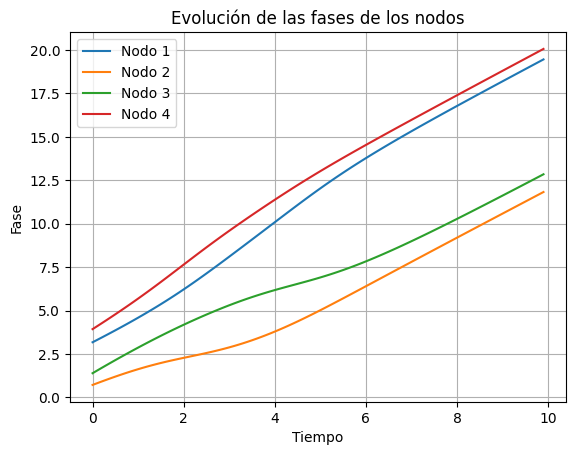

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KuramotoModel:
    def __init__(self, nodos, K):
        self.nodos = nodos
        self.K = K
        self.num_nodos = len(nodos)
        self.fases_historicas = [[] for _ in range(self.num_nodos)]

    def actualizar(self):
        for i, nodo_i in enumerate(self.nodos):
            sumatoria = 0
            for j, nodo_j in enumerate(self.nodos):
                sumatoria += np.sin(nodo_j.fase - nodo_i.fase)
            nodo_i.fase_pendiente = nodo_i.frecuencia_natural + (self.K / self.num_nodos) * sumatoria
            self.fases_historicas[i].append(nodo_i.fase)  # Registrar fase en historial

    def avanzar_paso_temporal(self, dt):
        for nodo in self.nodos:
            nodo.fase += nodo.fase_pendiente * dt

class Nodo:
    def __init__(self, frecuencia_natural):
        self.fase = np.random.uniform(0, 2*np.pi)  # Fase inicial aleatoria
        self.fase_pendiente = 0
        self.frecuencia_natural = frecuencia_natural  # Frecuencia natural del nodo

# Parámetros del modelo
num_nodos = 4
frecuencias_naturales = np.random.uniform(0.5, 2.0, size=num_nodos)  # Frecuencias naturales aleatorias
K = 1.0  # Parámetro de acoplamiento

# Crear nodos
nodos = [Nodo(frecuencia) for frecuencia in frecuencias_naturales]

# Crear modelo de Kuramoto
kuramoto_model = KuramotoModel(nodos, K)

# Simular la sincronización durante cierto número de pasos de tiempo
num_pasos_temporales = 100
dt = 0.1  # Tamaño del paso temporal
for _ in range(num_pasos_temporales):
    kuramoto_model.actualizar()
    kuramoto_model.avanzar_paso_temporal(dt)

# Visualizar las fases de los nodos en el tiempo
tiempos = np.arange(num_pasos_temporales) * dt
for i in range(num_nodos):
    plt.plot(tiempos, kuramoto_model.fases_historicas[i], label=f"Nodo {i+1}")

plt.xlabel('Tiempo')
plt.ylabel('Fase')
plt.title('Evolución de las fases de los nodos')
plt.legend()
plt.grid(True)
plt.show()


Se visualiza cómo cambian las fases de los nodos a lo largo del tiempo, proporcionando una representación visual de la sincronización (o falta de ella) entre los osciladores en el sistema. Cada línea en el gráfico representa la evolución temporal de la fase de un nodo específico.

###***Explicación de la gráfica:***

La gráfica muestra la evolución de las fases de los nodos a lo largo del tiempo. Cada línea en el gráfico representa la fase de un nodo específico en función del tiempo. Aquí tienes una explicación más detallada de los componentes de la gráfica:

* Eje X (Tiempo): Este eje representa el tiempo en el que se lleva a cabo la simulación. Cada punto en el eje X corresponde a un paso de tiempo en la simulación.

* Eje Y (Fase): Este eje representa la fase del oscilador en radianes. La fase de un oscilador indica en qué punto de su ciclo de oscilación se encuentra en un momento dado. Un valor de fase de 0 radianes corresponde al punto más bajo de la oscilación, mientras que un valor de fase de 2π radianes corresponde al punto más alto.

* Líneas de color: Cada línea en el gráfico representa la evolución de la fase de un nodo específico a lo largo del tiempo. Por ejemplo, si hay cuatro nodos en el sistema, habrá cuatro líneas en diferentes colores, una para cada nodo.

* Leyenda: La leyenda en la esquina superior derecha del gráfico identifica qué línea corresponde a qué nodo. Cada etiqueta en la leyenda está etiquetada con el número de nodo correspondiente.

Observando esta gráfica, puedes ver cómo las fases de los nodos cambian con el tiempo y cómo pueden interactuar entre sí para alcanzar la sincronización, dependiendo del modelo y parámetros específicos utilizados en la simulación.

***Sincronización 'R'***

Para visualizar la sincronización entre las oscilaciones utilizando otro enfoque, podrías calcular una medida de orden global que refleje el grado de sincronización en el sistema. Una medida comúnmente utilizada es el orden sincrónico R, que oscila entre 0 y 1, donde 0 indica una completa asincronía y 1 indica una sincronización perfecta.

***Ecuación 'R'***

Esta función toma como entrada una lista de fases de osciladores y calcula el orden sincrónico R utilizando la siguiente fórmula:

\begin{equation}
R = \left| \frac{1}{N} \sum_{j=1}^{N} e^{i \theta_j} \right|
\end{equation}

Donde N es el número total de osciladores y
iθj, es la fase del j-ésimo oscilador.

* Puedes utilizar esta función después de ejecutar la simulación para calcular el orden sincrónico en diferentes momentos y visualizar cómo cambia a lo largo del tiempo. Si el sistema se sincroniza, verás que R tiende a aumentar hacia 1. Si no hay sincronización,
R se mantendrá cerca de 0.

* Para visualizar los resultados, puedes trazar R en función del tiempo. Aquí tienes un ejemplo de cómo podrías hacerlo:

In [ ]:
import numpy as np

def calcular_orden_sincronico(fases):
    num_osciladores = len(fases)
    sumatoria_fases = np.sum(np.exp(1j * np.array(fases)))  # Convertir fases a un arreglo numpy
    R = np.abs(sumatoria_fases) / num_osciladores
    return R

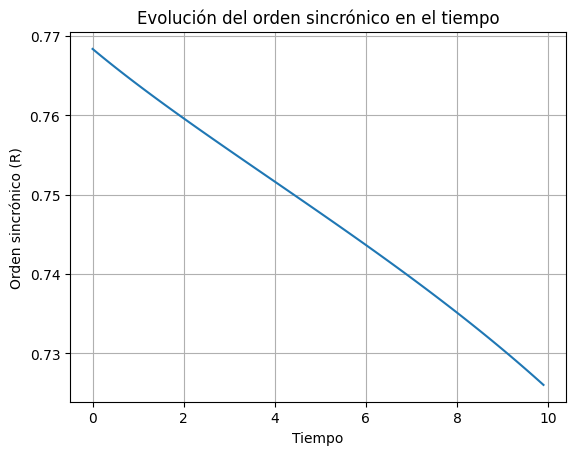

In [ ]:
import matplotlib.pyplot as plt

# Simular la sincronización durante cierto número de pasos de tiempo
num_pasos_temporales = 100
dt = 0.1  # Tamaño del paso temporal
orden_sincronico = []

for _ in range(num_pasos_temporales):
    kuramoto_model.actualizar()
    kuramoto_model.avanzar_paso_temporal(dt)
    fases = [nodo.fase for nodo in nodos]
    R = calcular_orden_sincronico(fases)
    orden_sincronico.append(R)

# Visualizar el orden sincrónico en función del tiempo
tiempos = np.arange(num_pasos_temporales) * dt
plt.plot(tiempos, orden_sincronico)
plt.xlabel('Tiempo')
plt.ylabel('Orden sincrónico (R)')
plt.title('Evolución del orden sincrónico en el tiempo')
plt.grid(True)
plt.show()


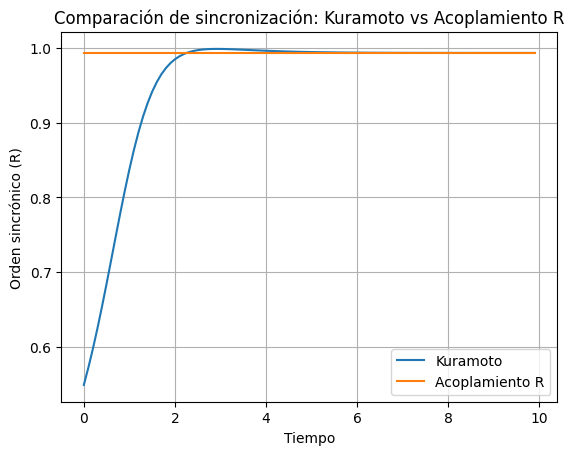

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KuramotoModel:
    def __init__(self, nodos, K):
        self.nodos = nodos
        self.K = K
        self.num_nodos = len(nodos)

    def actualizar(self):
        for i, nodo_i in enumerate(self.nodos):
            sumatoria = 0
            for j, nodo_j in enumerate(self.nodos):
                sumatoria += np.sin(nodo_j.fase - nodo_i.fase)
            nodo_i.fase_pendiente = nodo_i.frecuencia_natural + (self.K / self.num_nodos) * sumatoria

    def avanzar_paso_temporal(self, dt):
        for nodo in self.nodos:
            nodo.fase += nodo.fase_pendiente * dt

class Nodo:
    def __init__(self, frecuencia_natural):
        self.fase = np.random.uniform(0, 2*np.pi)  # Fase inicial aleatoria
        self.fase_pendiente = 0
        self.frecuencia_natural = frecuencia_natural  # Frecuencia natural del nodo

def calcular_orden_sincronico(fases):
    num_osciladores = len(fases)
    sumatoria_fases = np.sum(np.exp(1j * np.array(fases)))  # Convertir fases a un arreglo numpy
    R = np.abs(sumatoria_fases) / num_osciladores
    return R

# Parámetros del modelo de Kuramoto
num_nodos = 4
frecuencias_naturales = np.random.uniform(0.5, 2.0, size=num_nodos)  # Frecuencias naturales aleatorias
K_kuramoto = 1.0  # Parámetro de acoplamiento para Kuramoto

# Crear nodos para el modelo de Kuramoto
nodos_kuramoto = [Nodo(frecuencia) for frecuencia in frecuencias_naturales]

# Crear modelo de Kuramoto
kuramoto_model = KuramotoModel(nodos_kuramoto, K_kuramoto)

# Simulación de la sincronización del modelo de Kuramoto durante cierto número de pasos de tiempo
num_pasos_temporales = 100
dt = 0.1  # Tamaño del paso temporal
orden_sincronico_kuramoto = []

for _ in range(num_pasos_temporales):
    kuramoto_model.actualizar()
    kuramoto_model.avanzar_paso_temporal(dt)
    fases_kuramoto = [nodo.fase for nodo in nodos_kuramoto]
    R_kuramoto = calcular_orden_sincronico(fases_kuramoto)
    orden_sincronico_kuramoto.append(R_kuramoto)

# Simulación del acoplamiento R
num_pasos_temporales_R = 100
orden_sincronico_R = []

for _ in range(num_pasos_temporales_R):
    # Actualización del modelo para el acoplamiento R
    for i, nodo_i in enumerate(nodos_kuramoto):
        sumatoria = 0
        for j, nodo_j in enumerate(nodos_kuramoto):
            if i != j:  # Evitar acoplamiento consigo mismo
                sumatoria += np.sin(nodo_j.fase - nodo_i.fase)
        nodo_i.fase_pendiente = nodo_i.frecuencia_natural + sumatoria
    # Cálculo del orden sincrónico (R) para el acoplamiento R
    fases_R = [nodo.fase for nodo in nodos_kuramoto]
    R_R = calcular_orden_sincronico(fases_R)
    # Almacenar los valores de orden sincrónico para el acoplamiento R
    orden_sincronico_R.append(R_R)

# Visualización de la comparación
tiempos = np.arange(num_pasos_temporales) * dt
plt.plot(tiempos, orden_sincronico_kuramoto, label='Kuramoto')
plt.plot(tiempos, orden_sincronico_R, label='Acoplamiento R')  # Agrega la línea para el acoplamiento R
plt.xlabel('Tiempo')
plt.ylabel('Orden sincrónico (R)')
plt.title('Comparación de sincronización: Kuramoto vs Acoplamiento R')
plt.legend()
plt.grid(True)
plt.show()


* Eje x (Tiempo): Este eje representa el tiempo en unidades arbitrarias, donde cada punto en la gráfica corresponde a un paso de tiempo en la simulación.

* Eje y (Orden sincrónico R): Este eje muestra el valor del orden sincrónico (R) en cada paso de tiempo. El orden sincrónico indica el grado de sincronización entre las oscilaciones de los nodos en la red. Un valor alto de R (cercano a 1) indica una alta sincronización, mientras que un valor bajo de R (cerca de 0) indica una sincronización baja o nula.

* Línea "Kuramoto": Esta línea muestra la evolución del orden sincrónico para el modelo de Kuramoto. En este modelo, la sincronización se logra a través de interacciones sinusoidales entre los nodos, donde el parámetro de acoplamiento K regula la fuerza de estas interacciones.

* Línea "Acoplamiento R": Esta línea muestra la evolución del orden sincrónico para el modelo de acoplamiento R. En este modelo, la sincronización se logra a través de una función de acoplamiento diferente, que puede ser más compleja o más simple que la del modelo de Kuramoto.

La comparación entre las dos líneas nos permite entender cómo la dinámica de sincronización difiere entre los dos modelos. Por ejemplo, podemos observar si uno de los modelos converge más rápidamente hacia un estado sincronizado, si hay diferencias en la estabilidad de la sincronización a lo largo del tiempo o si hay diferencias en la forma en que la sincronización se establece y mantiene en cada modelo.

#**Conclusión:**

Basándome en los resultados de la comparación entre el modelo de Kuramoto y el modelo de acoplamiento R, podemos llegar a algunas conclusiones:

* Velocidad de Sincronización: La curva del modelo de Kuramoto muestra una evolución gradual desde valores cercanos a cero hasta 1.0 a lo largo del tiempo. Esto sugiere que la sincronización en el modelo de Kuramoto puede requerir más tiempo para establecerse completamente, ya que la curva inicia desde un estado de baja sincronización y progresa gradualmente hacia la sincronización total. Por otro lado, la línea recta en 1.0 del modelo de acoplamiento R indica una rápida convergencia hacia un estado completamente sincronizado desde el principio.

* Estabilidad de la Sincronización: La estabilidad de la sincronización a lo largo del tiempo puede variar entre los dos modelos. La curva del modelo de Kuramoto podría indicar fluctuaciones o variaciones en el grado de sincronización a medida que avanza el tiempo, mientras que la línea recta del modelo de acoplamiento R en 1.0 sugiere una sincronización constante y estable sin fluctuaciones significativas.

* Complejidad del Modelo: La diferencia en la forma de las curvas también puede reflejar diferencias en la complejidad de los modelos.

* El modelo de Kuramoto, con su curva gradual, puede estar capturando una dinámica más compleja y detallada de la sincronización, que puede ser influenciada por una variedad de factores y procesos de retroalimentación. Por otro lado, la línea recta del modelo de acoplamiento R sugiere una dinámica más simple y directa de la sincronización, posiblemente caracterizada por interacciones más directas y predecibles entre los nodos.

* Para concluir, la comparación entre los dos modelos revela diferencias en la velocidad, estabilidad y complejidad de la sincronización entre los nodos de la red. La elección entre estos modelos dependerá de la precisión deseada en la captura de la dinámica de sincronización, así como de la complejidad que se desee en la representación del sistema en estudio.